In [1]:
from keras.datasets import cifar100
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.callbacks import EarlyStopping
from keras.utils import load_img,to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
(X_train,y_train),(X_test,y_test)=cifar100.load_data()


169001437/169001437 [==============================] - 4s 0us/step


In [9]:
labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed','bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge','bus', 'butterfly','camel', 'can', 'castle', 'caterpillar','cattle', 'chair','chimpanzee', 'clock',
'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup','dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox','girl',
'hamster', 'house', 'kangaroo', 'computer_keyboard',
'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine','possum',
'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
'sweet_pepper','table', 'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle',
'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


In [10]:
fig,ax=plt.subplots(10,10,figsize=(96,96))
ax=ax.ravel()
for i in range(0,100):
 image=X_train[i]
 label=int(y_train[i])
 ax[i].imshow(image)
 ax[i].set_title(labels[label],fontdict={'size':60})

In [11]:
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")
X_train/=255.0
X_test/=255.0

In [12]:
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)
print('One hot Encoded: ',y_train[0])


One hot Encoded:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [13]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)


Shape of X_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000, 100)
Shape of X_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000, 100)


In [15]:
 # model creation
model=Sequential()
model.add(Conv2D(100,(2,2), input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(80,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(100, activation='softmax'))


In [16]:
#compile model
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 31, 31, 100)       1300      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 100)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 80)        32080     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 80)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 50)          16050     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 50)        

In [19]:
 # to train model
EPOCHS=50
Batch_size=32
callback=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
history=model.fit(X_train,y_train,
batch_size=Batch_size,
validation_data=(X_test,y_test),
callbacks=callback,
epochs=EPOCHS,
verbose=1,
shuffle=True)


Epoch 1/50
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5369 - accuracy: 0.5648 - val_loss: 2.7146 - val_accuracy: 0.3632
Epoch 2/50
1563/1563 [==============================] - 118s 75ms/step - loss: 1.3993 - accuracy: 0.5970 - val_loss: 2.8449 - val_accuracy: 0.3742
Epoch 3/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.2727 - accuracy: 0.6298 - val_loss: 2.9537 - val_accuracy: 0.3664
Epoch 4/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.1562 - accuracy: 0.6576 - val_loss: 3.1336 - val_accuracy: 0.3542
Epoch 5/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.0297 - accuracy: 0.6940 - val_loss: 3.4145 - val_accuracy: 0.3558
Epoch 5: early stopping


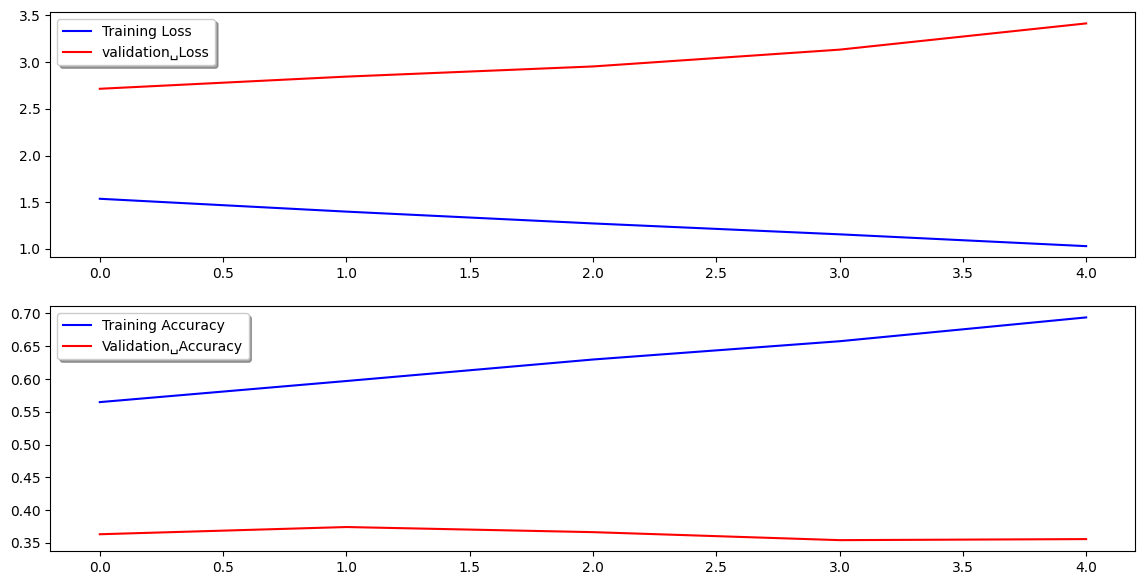

In [22]:
fig, ax = plt.subplots(2, 1,figsize=(14,7))
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation␣Loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation␣Accuracy")
legend = ax[1].legend(loc='best', shadow=True)
